# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [44]:
# Dependencies and Setup

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import seaborn as sns
from datetime import datetime

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
   # print (city)
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count

len(cities)


627

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:

# Create base URL and indicate imperial units
url =( 'http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=' + api_key)
url

'http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=45dd0a2ef6784d9c5da1bc6119719b1f'

In [4]:
#Initiate counter for city number below
number = 1
set_count = 0

#Lists for holding required items
city_name = []
lat = []
lng = []
temp = []
humid = []
clouds = []
wind = []
country=[]
Date=[]
max_temp=[]

#Loop through each city, extract required items, and print result
print('------------------------------')
print(' Beginning Data Retrieval ')
print('------------------------------')

for city in cities:
    set_count += 1
    try:
        city_data = (requests.get(url + '&q=' + city)).json()
        #print(city_data)
        city_name.append(city_data['name'])
        Date.append(city_data['dt'])
        country.append(city_data['sys']['country'])
        lat.append(city_data['coord']['lat'])
        lng.append(city_data['coord']['lon'])
        temp.append(city_data['main']['temp'])
        max_temp.append(city_data['main']['temp_max'])
        humid.append(city_data['main']['humidity'])
        clouds.append(city_data['clouds']['all'])
        wind.append(city_data['wind']['speed'])
        print(f'City number {number} of set{set_count} complete. | {city}')
        number = number + 1
    
    except KeyError:
        print(f'City not found.Skipping...')
        number = number + 1
        
print('------------------------------')
print('End of Records')
print('------------------------------')

------------------------------
 Beginning Data Retrieval 
------------------------------
City number 1 of set1 complete. | hobart
City number 2 of set2 complete. | rikitea
City number 3 of set3 complete. | busselton
City number 4 of set4 complete. | bredasdorp
City number 5 of set5 complete. | ushuaia
City number 6 of set6 complete. | punta arenas
City number 7 of set7 complete. | orcopampa
City number 8 of set8 complete. | saskylakh
City number 9 of set9 complete. | san cristobal
City number 10 of set10 complete. | mataura
City number 11 of set11 complete. | kapaa
City number 12 of set12 complete. | gillette
City number 13 of set13 complete. | lianzhou
City number 14 of set14 complete. | arraial do cabo
City number 15 of set15 complete. | san vicente
City number 16 of set16 complete. | raudeberg
City number 17 of set17 complete. | hualmay
City number 18 of set18 complete. | torbay
City number 19 of set19 complete. | qaanaaq
City number 20 of set20 complete. | thompson
City number 21 o

City number 184 of set184 complete. | ewa beach
City number 185 of set185 complete. | chegdomyn
City number 186 of set186 complete. | bambous virieux
City number 187 of set187 complete. | atar
City number 188 of set188 complete. | longyearbyen
City number 189 of set189 complete. | bethel
City number 190 of set190 complete. | pangoa
City number 191 of set191 complete. | mezhdurechensk
City number 192 of set192 complete. | porto novo
City number 193 of set193 complete. | saint george
City number 194 of set194 complete. | owando
City number 195 of set195 complete. | viedma
City number 196 of set196 complete. | filingue
City number 197 of set197 complete. | pangody
City number 198 of set198 complete. | conde
City number 199 of set199 complete. | nouakchott
City number 200 of set200 complete. | north bend
City not found.Skipping...
City number 202 of set202 complete. | kenai
City number 203 of set203 complete. | lasa
City number 204 of set204 complete. | agadez
City number 205 of set205 com

City number 368 of set368 complete. | souillac
City number 369 of set369 complete. | pirawa
City number 370 of set370 complete. | donzdorf
City number 371 of set371 complete. | ramgarh
City number 372 of set372 complete. | presidente medici
City number 373 of set373 complete. | sangmelima
City number 374 of set374 complete. | klaksvik
City number 375 of set375 complete. | mount isa
City not found.Skipping...
City number 377 of set377 complete. | narsaq
City number 378 of set378 complete. | constancia
City number 379 of set379 complete. | gravdal
City number 380 of set380 complete. | tecoanapa
City number 381 of set381 complete. | northampton
City number 382 of set382 complete. | goderich
City not found.Skipping...
City number 384 of set384 complete. | teahupoo
City number 385 of set385 complete. | port-cartier
City number 386 of set386 complete. | dukat
City number 387 of set387 complete. | makaha
City number 388 of set388 complete. | paramonga
City number 389 of set389 complete. | kun

City number 552 of set552 complete. | port moresby
City not found.Skipping...
City number 554 of set554 complete. | kenora
City number 555 of set555 complete. | kaniama
City number 556 of set556 complete. | ilulissat
City number 557 of set557 complete. | ixil
City number 558 of set558 complete. | dongkan
City number 559 of set559 complete. | marondera
City number 560 of set560 complete. | amapa
City number 561 of set561 complete. | vardo
City number 562 of set562 complete. | kudahuvadhoo
City number 563 of set563 complete. | rudnogorsk
City not found.Skipping...
City number 565 of set565 complete. | ola
City not found.Skipping...
City number 567 of set567 complete. | zabid
City number 568 of set568 complete. | gornoye loo
City number 569 of set569 complete. | muzhi
City number 570 of set570 complete. | beringovskiy
City not found.Skipping...
City number 572 of set572 complete. | jintur
City not found.Skipping...
City number 574 of set574 complete. | shingu
City number 575 of set575 com

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
#Create a dataframe with required items
city_data_df = pd.DataFrame({'City': city_name,
                             'Country': country,
                             'Date':Date,
                            'Latitude': lat,
                            'Longitude': lng,
                            'Temperature': temp,
                            'Humidity': humid,
                            'Cloudiness': clouds,
                             'Max_Temp': max_temp,
                            'Wind Speed': wind
                            })

#Save dataframe as csv
pd.DataFrame.to_csv(city_data_df, 'city_data.csv')

city_data_df.head()

,City,Country,Date,Latitude,Longitude,Temperature,Humidity,Cloudiness,Max_Temp,Wind Speed
0,Hobart,AU,1553545935,-42.88,147.33,52.83,47,40,55.40,21.92
1,Rikitea,PF,1553546005,-23.12,-134.97,78.57,100,80,78.57,9.42
2,Busselton,AU,1553545928,-33.64,115.35,54.95,44,20,57.00,19.71
3,Bredasdorp,ZA,1553545833,-34.53,20.04,63.70,72,20,66.20,1.12
4,Ushuaia,AR,1553544000,-54.81,-68.31,47.59,87,40,50.00,17.22


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

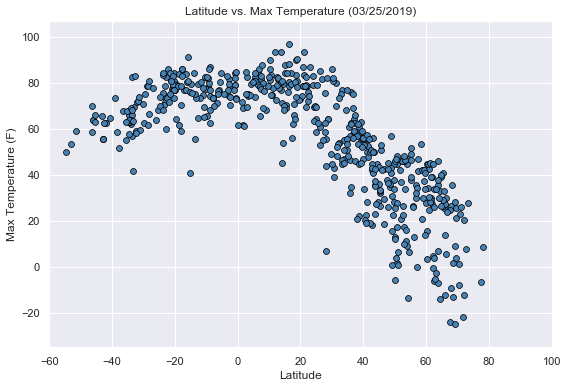

In [46]:
# Set the aesthetic using Seaborn
sns.set()

# Increase the size of the figure
plt.figure(figsize=(9,6))

# Plot the lat vs the max temp
plt.scatter(x = city_data_df['Latitude'], y = city_data_df['Max_Temp'],
            linewidths = 0.75, edgecolors = 'black', color = 'steelblue', s=35)

# Add labeling
# This extracts the date and returns it in the local time zone
weather_dt = datetime.fromtimestamp(city_data_df.loc[0,"Date"]).strftime('%m/%d/%Y')
plt.title(f"Latitude vs. Max Temperature ({weather_dt})")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")

# Modify ticks
plt.xlim(-60,100)
plt.ylim(min(city_data_df['Max_Temp']) - 10, max(city_data_df['Max_Temp']) + 10)

#plt.grid()
plt.show()

#### Latitude vs. Humidity Plot

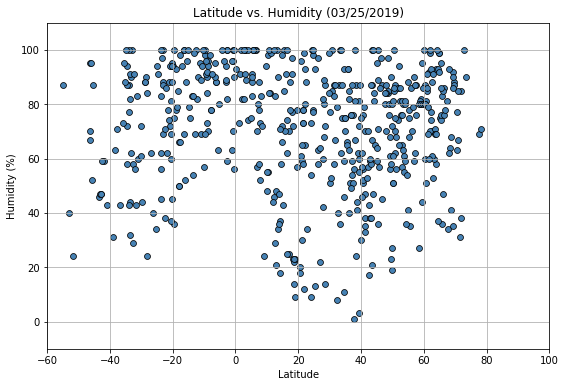

In [41]:
# Increase the size of the figure
plt.figure(figsize=(9,6))

# Plot the lat vs the max temp
plt.scatter(x = city_data_df['Latitude'], y = city_data_df['Humidity'],
            linewidths = 0.75, edgecolors = 'black', color = 'steelblue', s=35)

# Add labeling
# This extracts the date and returns it in the local time zone
weather_dt = datetime.fromtimestamp(city_data_df.loc[0,"Date"]).strftime('%m/%d/%Y')
plt.title(f"Latitude vs. Humidity ({weather_dt})")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

# Modify ticks
plt.xlim(-60,100)
plt.ylim(-10, 110)
plt.grid()

plt.show()

#### Latitude vs. Cloudiness Plot

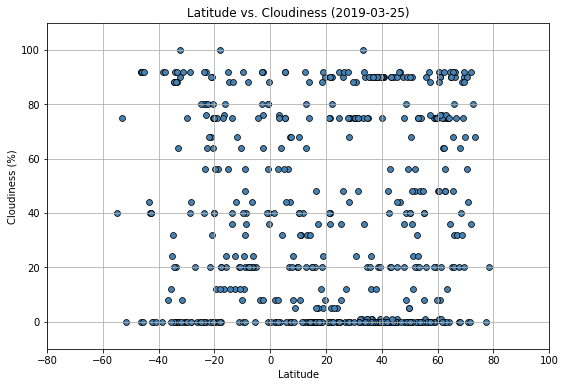

In [42]:
# Increase the size of the figure
plt.figure(figsize=(9,6))

# Plot the lat vs the max temp
plt.scatter(x = city_data_df['Latitude'], y = city_data_df['Cloudiness'],
            linewidths = 0.75, edgecolors = 'black', color = 'steelblue', s=35)

# Add labeling
# This extracts the date and returns it in the local time zone
weather_dt = datetime.fromtimestamp(city_data_df.loc[0,"Date"]).strftime('%Y-%m-%d')
plt.title(f"Latitude vs. Cloudiness ({weather_dt})")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid()
# Modify ticks
plt.xlim(-80,100)
plt.ylim(-10, 110)


plt.show()

#### Latitude vs. Wind Speed Plot

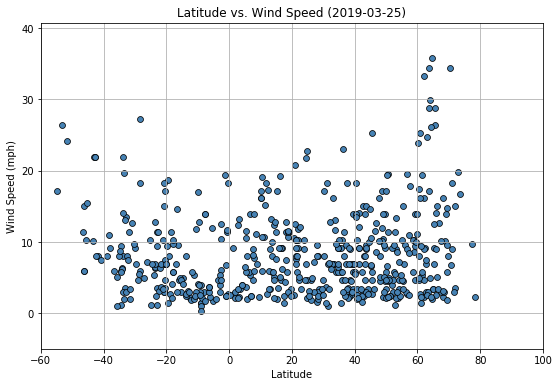

In [43]:
# Increase the size of the figure
plt.figure(figsize=(9,6))

# Plot the lat vs the max temp
plt.scatter(x = city_data_df['Latitude'], y = city_data_df['Wind Speed'],
            linewidths = 0.75, edgecolors = 'black', color = 'steelblue', s=35)

# Add labeling
# This extracts the date and returns it in the local time zone
weather_dt = datetime.fromtimestamp(city_data_df.loc[0,"Date"]).strftime('%Y-%m-%d')
plt.title(f"Latitude vs. Wind Speed ({weather_dt})")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")

# Modify ticks
plt.xlim(-60,100)
plt.ylim(-5, max(city_data_df['Wind Speed']+5))
plt.grid()

plt.show()
